In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
# Script definitions
# ------------------

# Mode indicates the code and data to be used and analyzed
# 0 - DAXPY
# 1 - Histogram_1
# 2 - Histogram_3
# 3 - Convolution

mode = 0

# DAXPY - data_1.csv
# Histogram_1 - data_2.csv
# Histogram_3 - data_3.csv

data_files = ['data_1.csv', 'data_2.csv', 'data_3.csv', 'data_4.csv']

# Define the path to the data file
data_file = os.path.join('../../lab2/data', data_files[mode])

# Define image output directory
images_dir = '../images'

# Fix values for the number of operations
# Value indicated in the lab2 documentation
# 6 * 1024 * 1024 * 1024 = 6 GB in 8 bytes (double) elements
fixed_n = (6 * 1024 * 1024 * 1024) / 8

In [3]:
# Create the output directory if it doesn't exist
if not os.path.exists(images_dir):

	os.mkdir(images_dir)

else :

	os.system("rm -r " + images_dir)
	os.mkdir(images_dir)

In [4]:
# Load the data into a pandas DataFrame
data = pd.read_csv(data_file, sep=',', header=None)

# Add column names to the DataFrame
# DAXPY - printf("PAE,%d,%d,%d,%f,%f,%f,%f,%f,%f,%ld,%f,PAE\n", threadsPerBlock, blocksPerGrid, maxBlocksPerSM, occupancy, overhead, alloc_time, init_time, daxpy_time, total_time, n, alpha);
# Histogram - printf("\nPAE,%s,%d,%d,%d,%f,%f,%f,%f,%f,%f,%f,%f,%ld,PAE\n", imagePath, threadsPerBlock, blocksPerGrid, maxBlocksPerSM, occupancy, overhead, alloc_time, init_time, histogram_time, hd_time, dh_time, total_time, imageSize);

all_columns = [
	['threadsPerBlock', 'blocksPerGrid', 'maxBlocksPerSM', 'occupancy', 'overhead', 'alloc_time', 'init_time', 'daxpy_time', 'total_time', 'n', 'alpha'],
	['imagePath', 'threadsPerBlock', 'blocksPerGrid', 'maxBlocksPerSM', 'occupancy', 'overhead', 'alloc_time', 'init_time', 'histogram_time', 'hd_time', 'dh_time', 'total_time', 'imageSize'],
	['imagePath', 'threadsPerBlock', 'blocksPerGrid', 'maxBlocksPerSM', 'occupancy', 'overhead', 'alloc_time', 'init_time', 'histogram_time', 'hd_time', 'dh_time', 'total_time', 'imageSize'],
]

data.columns = all_columns[mode]

# Print total number of rows and columns in the DataFrame
print("Total rows: {0}".format(len(data)))

Total rows: 990


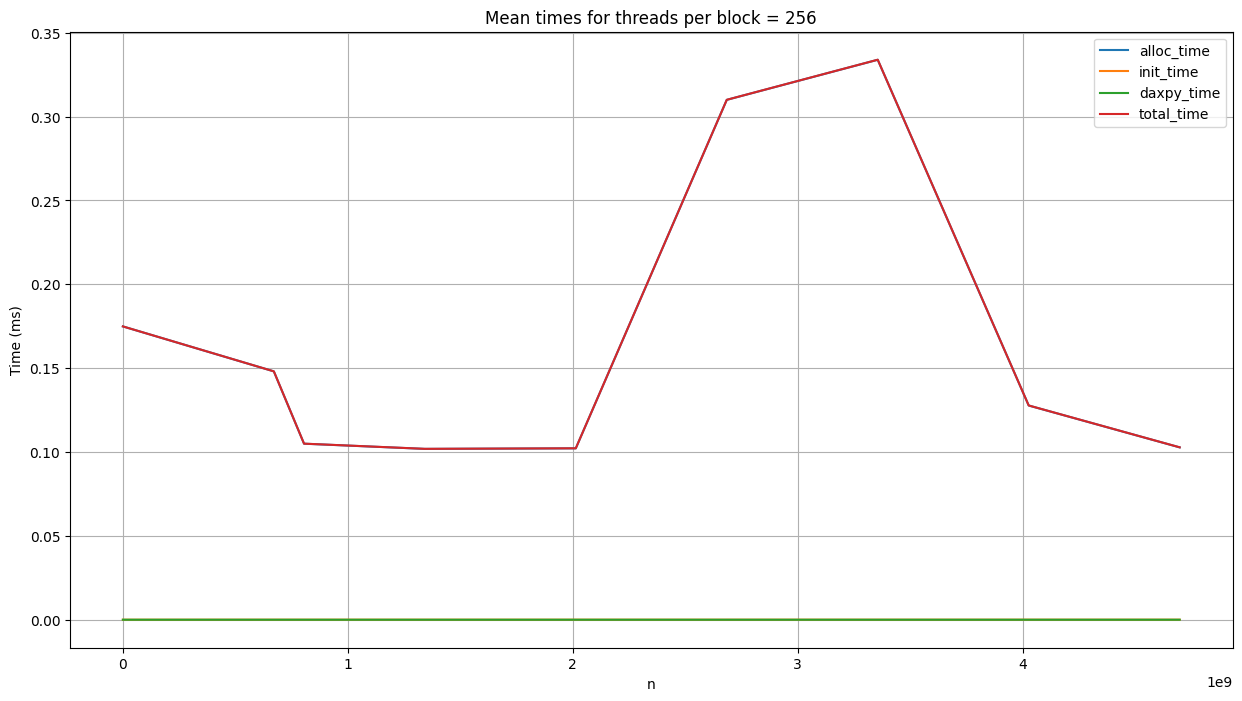

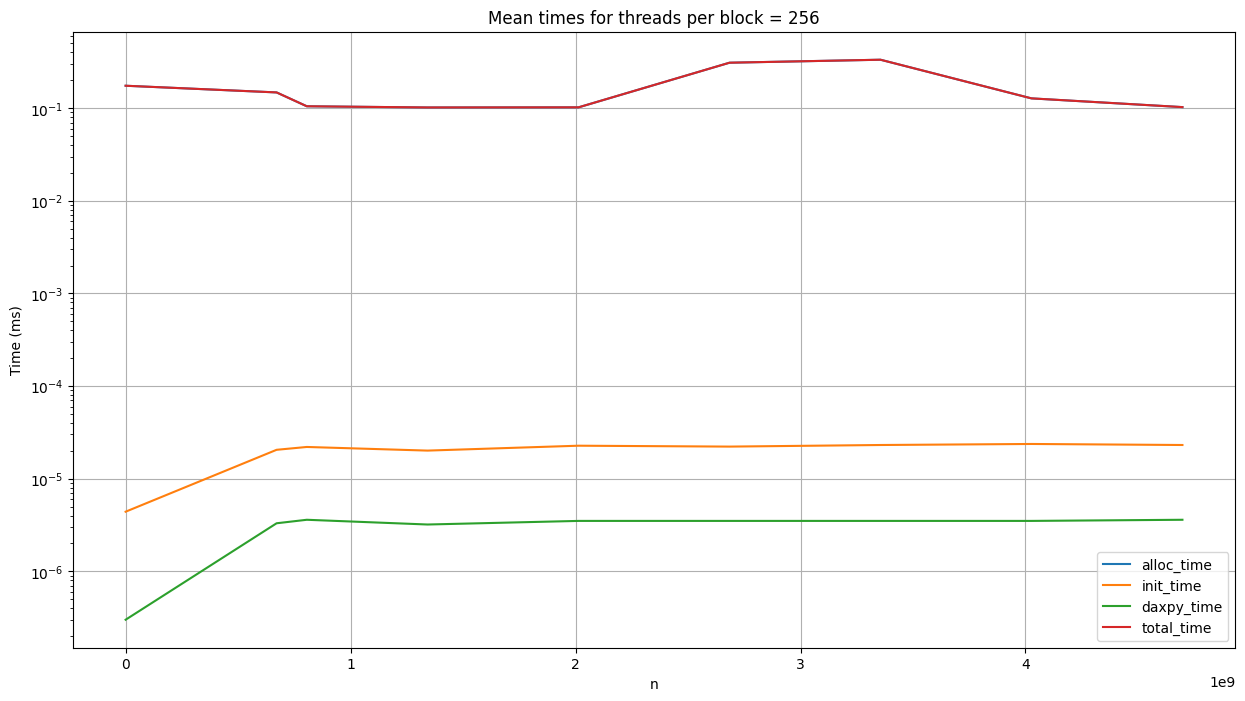

In [5]:
data_256 = data[data['threadsPerBlock'] == 256]

mean_alloc_time = data_256.groupby('n')['alloc_time'].mean()
mean_init_time = data_256.groupby('n')['init_time'].mean()
mean_daxpy_time = data_256.groupby('n')['daxpy_time'].mean()
mean_total_time = data_256.groupby('n')['total_time'].mean()

plt.figure(figsize=(15, 8))

plt.plot(mean_alloc_time.index, mean_alloc_time, label='alloc_time')
plt.plot(mean_init_time.index, mean_init_time, label='init_time')
plt.plot(mean_daxpy_time.index, mean_daxpy_time, label='daxpy_time')
plt.plot(mean_total_time.index, mean_total_time, label='total_time')

plt.xlabel('n')
plt.ylabel('Time (ms)')

plt.title('Mean times for threads per block = 256')

plt.legend()
plt.grid()

plt.savefig(os.path.join(images_dir, 'mean_times_256.png'))

plt.show()

# Same plot with logarithmic scale

plt.figure(figsize=(15, 8))

plt.plot(mean_alloc_time.index, mean_alloc_time, label='alloc_time')
plt.plot(mean_init_time.index, mean_init_time, label='init_time')
plt.plot(mean_daxpy_time.index, mean_daxpy_time, label='daxpy_time')
plt.plot(mean_total_time.index, mean_total_time, label='total_time')

plt.xlabel('n')
plt.ylabel('Time (ms)')

plt.title('Mean times for threads per block = 256')

plt.legend()
plt.grid()
plt.yscale('log')

plt.savefig(os.path.join(images_dir, 'mean_times_256_log.png'))

plt.show()

In [6]:
data_filtered = data[data['n'] == fixed_n]

df_filtered = data_filtered[['threadsPerBlock', 'occupancy', 'daxpy_time']]

df_max_occupancy = df_filtered[df_filtered['occupancy'] == 1.0]

grouped = df_max_occupancy.groupby('threadsPerBlock')['daxpy_time'].mean()

min_daxpy_time = grouped.idxmin()

print("Threads per block to get min daxpy time with full occupancy: {0}".format(min_daxpy_time))

Threads per block to get min daxpy time with full occupancy: 1024


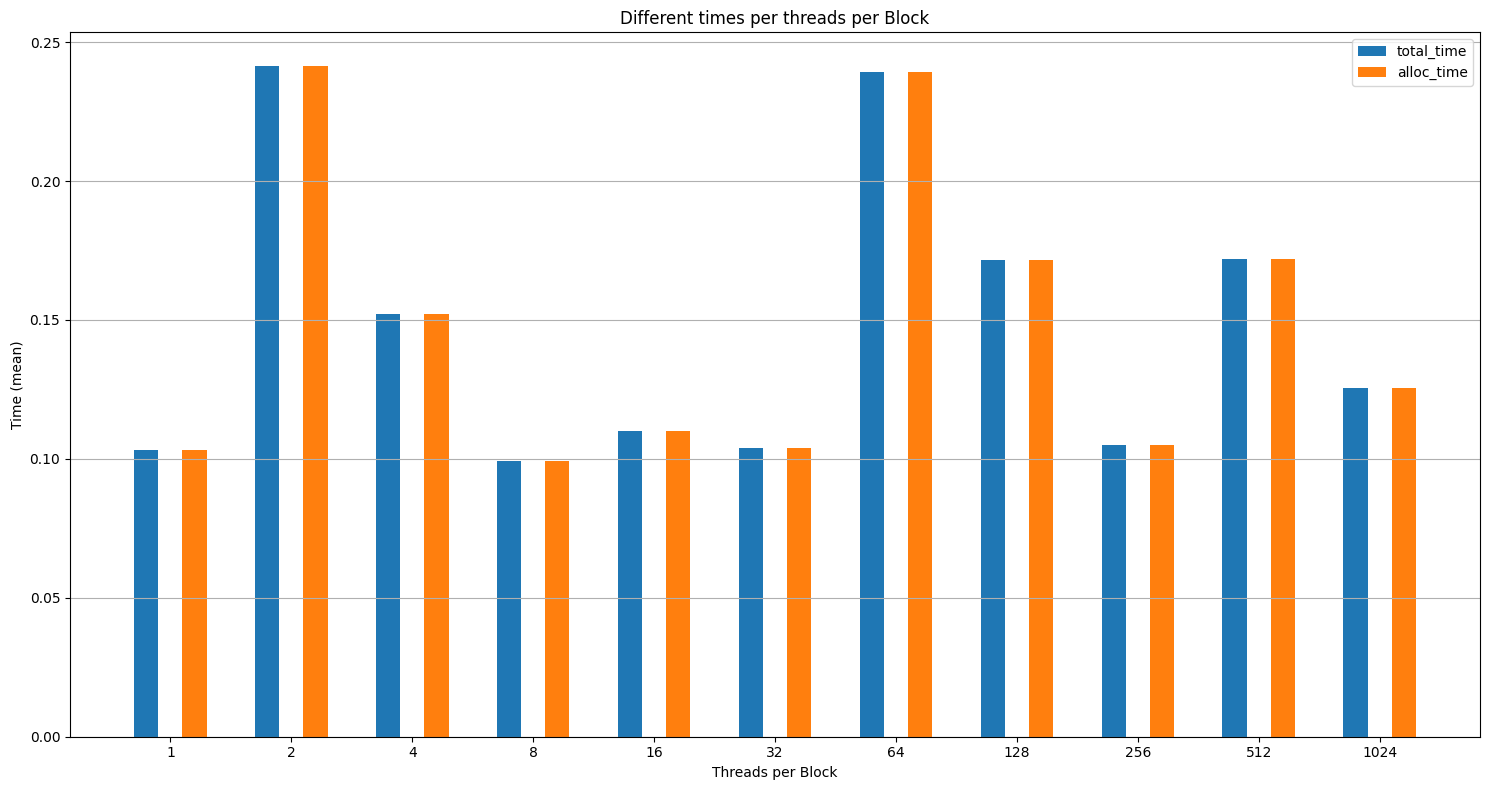

In [7]:
# Bar plot with all diferent times per threadsPerBlock unique values
# -----------------------------------------------------------------

data_filtered = data[data['n'] == fixed_n]

unique_threadsPerBlock = data_filtered['threadsPerBlock'].unique()
n_groups = len(unique_threadsPerBlock)
metrics = ['total_time', 'alloc_time']
n_metrics = len(metrics)

bar_width = 0.2
index = np.arange(n_groups)

plt.figure(figsize=(15, 8))

for j, metric in enumerate(metrics):

	means = [data_filtered[data_filtered['threadsPerBlock'] == tp][metric].mean() for tp in unique_threadsPerBlock]
	plt.bar(index + j * bar_width * 2, means, bar_width, label=metric)

plt.xlabel('Threads per Block')
plt.ylabel('Time (mean)')

plt.xticks(index + bar_width * (n_metrics / 2), unique_threadsPerBlock)

plt.title('Different times per threads per Block')
plt.legend()
plt.grid(axis='y')
plt.tight_layout()

plt.savefig(os.path.join(images_dir, 'times_per_threadsPerBlock_1.png'))

plt.show()

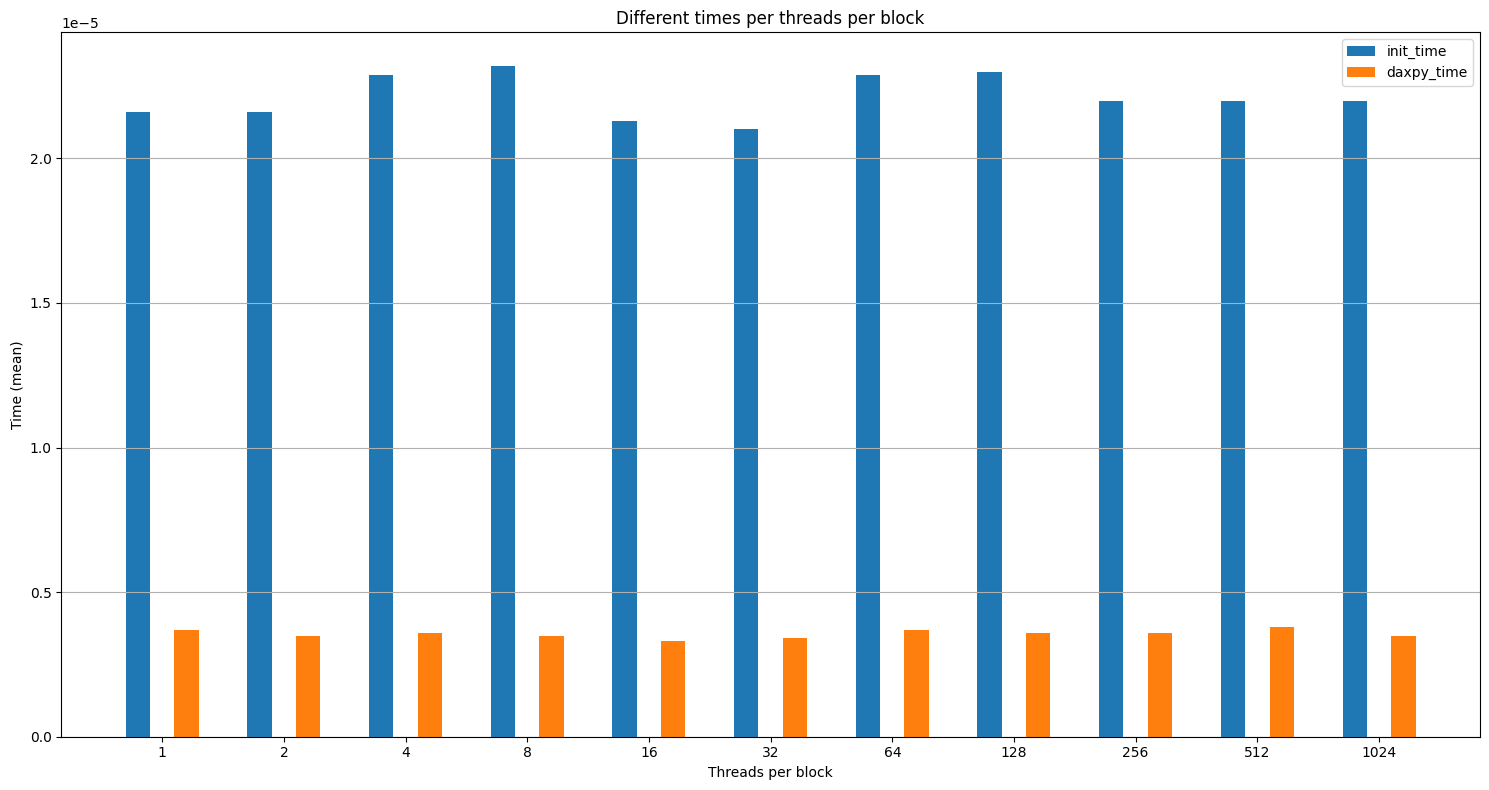

In [8]:
# Bar plot with all diferent times per threadsPerBlock unique values
# -----------------------------------------------------------------

data_filtered = data[data['n'] == fixed_n]

unique_threadsPerBlock = data_filtered['threadsPerBlock'].unique()
n_groups = len(unique_threadsPerBlock)
metrics = ['init_time', 'daxpy_time']
n_metrics = len(metrics)

bar_width = 0.2
index = np.arange(n_groups)

plt.figure(figsize=(15, 8))

for j, metric in enumerate(metrics):

	means = [data_filtered[data_filtered['threadsPerBlock'] == tp][metric].mean() for tp in unique_threadsPerBlock]
	plt.bar(index + j * bar_width * 2, means, bar_width, label=metric)

plt.xlabel('Threads per block')
plt.ylabel('Time (mean)')

plt.xticks(index + bar_width * (n_metrics / 2), unique_threadsPerBlock)

plt.title('Different times per threads per block')
plt.legend()
plt.grid(axis='y')
plt.tight_layout()

plt.savefig(os.path.join(images_dir, 'times_per_threadsPerBlock_2.png'))

plt.show()

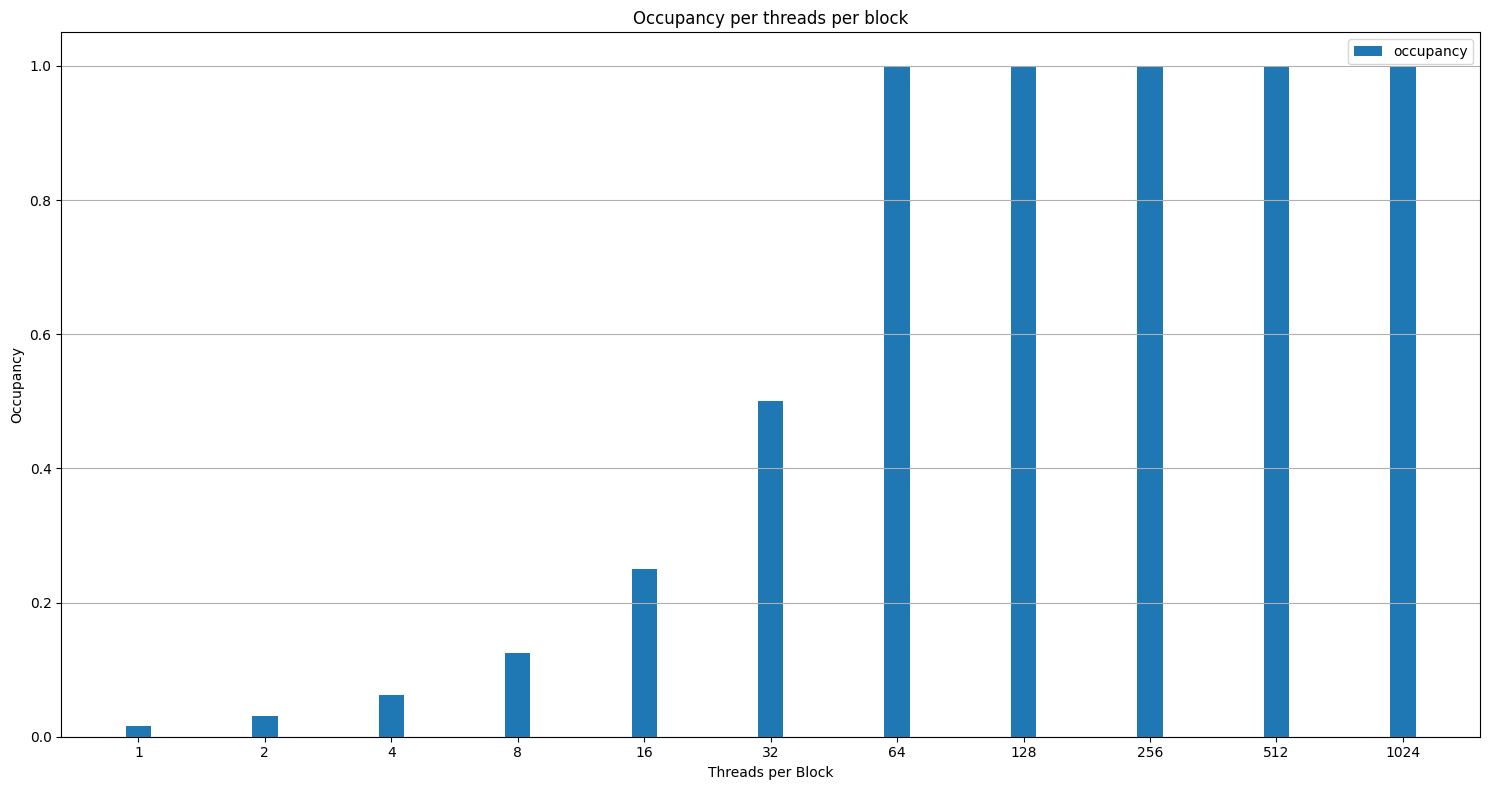

In [9]:
# Bar plot with occupancy per threadsPerBlock unique values
# --------------------------------------------------------

data_filtered = data[data['n'] == fixed_n]

unique_threadsPerBlock = data_filtered['threadsPerBlock'].unique()
n_groups = len(unique_threadsPerBlock)
metrics = ['occupancy']
n_metrics = len(metrics)

bar_width = 0.2
index = np.arange(n_groups)

plt.figure(figsize=(15, 8))

for j, metric in enumerate(metrics):

	means = [data_filtered[data_filtered['threadsPerBlock'] == tp][metric].mean() for tp in unique_threadsPerBlock]
	plt.bar(index + j * bar_width, means, bar_width, label=metric)

plt.xlabel('Threads per Block')
plt.ylabel('Occupancy')
plt.xticks(index, unique_threadsPerBlock)

plt.title('Occupancy per threads per block')
plt.legend()
plt.grid(axis='y')
plt.tight_layout()

plt.savefig(os.path.join(images_dir, 'occupancy_per_threadsPerBlock.png'))

plt.show()